# NLP With Hotel Review Part 1

# EDA

In [1]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

import string


import seaborn as sns
sns.set(style="darkgrid")

In [4]:
# load data
hotel_df=pd.read_csv("data/Hotel_Reviews.csv")

## 1.The target column of interest is Reviewer_Score.

### a. What is the shape of the dataset?

In [5]:
hotel_df.shape

(515738, 17)

In [6]:
print(f"hotel_df dataset has {hotel_df.shape[0]} rows and {hotel_df.shape[1]} columns.")

hotel_df dataset has 515738 rows and 17 columns.


In [6]:
hotel_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [7]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [8]:
hotel_df.isna().mean()

Hotel_Address                                 0.000000
Additional_Number_of_Scoring                  0.000000
Review_Date                                   0.000000
Average_Score                                 0.000000
Hotel_Name                                    0.000000
Reviewer_Nationality                          0.000000
Negative_Review                               0.000000
Review_Total_Negative_Word_Counts             0.000000
Total_Number_of_Reviews                       0.000000
Positive_Review                               0.000000
Review_Total_Positive_Word_Counts             0.000000
Total_Number_of_Reviews_Reviewer_Has_Given    0.000000
Reviewer_Score                                0.000000
Tags                                          0.000000
days_since_review                             0.000000
lat                                           0.006337
lng                                           0.006337
dtype: float64

In [9]:
hotel_df.duplicated().sum() # 526 duplicated rows

526

In [10]:
hotel_df=hotel_df.drop_duplicates() # drop duplicatwed rows

In [11]:
hotel_df.duplicated().T.sum() # no duplicated columns

0

In [7]:
print(f"After clean the hotel_df dataset has {hotel_df.shape[0]} rows and {hotel_df.shape[1]} columns.")

After clean the hotel_df dataset has 515738 rows and 17 columns.


### b.The reviews provided are all given as decimal values. Convert them into integers from 1 to 10

In [13]:
hotel_round=hotel_df.copy()

In [14]:
# convert column Reviewer_Score into 1-10 int
hotel_round['Reviewer_Score']=hotel_round['Reviewer_Score'].round(0).astype(int)

In [15]:
hotel_round.sample() # check if Reviewer_Score has been covert into num 1-10

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
25466,100 Queen s Gate Kensington and Chelsea London...,541,10/17/2015,8.0,Doubletree by Hilton London Kensington,United Kingdom,The noise from the corridor outside the room ...,17,2367,The location,3,13,7,"[' Business trip ', ' Couple ', ' Club Double ...",656 day,51.492514,-0.178792


### c. The reviews are scored from 1 to 10. What do you expect the distribution of scores to look like? What is the actual distribution of reviews?

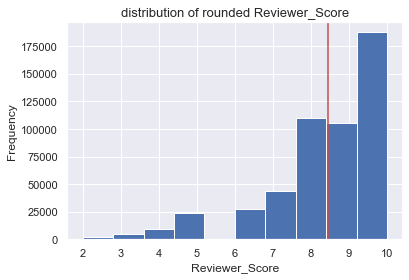

In [16]:
# distribution of rounded Reviewer_Score
hotel_round['Reviewer_Score'].plot(kind='hist')
plt.xlabel("Reviewer_Score")
plt.title("distribution of rounded Reviewer_Score",fontsize=13)
plt.axvline(x=hotel_round['Reviewer_Score'].mean(), color='r', linestyle='-')
plt.show()


In [17]:
(hotel_round['Reviewer_Score']==8).sum()

110035

In [18]:
hotel_round['Reviewer_Score'].agg(['mean','median']).to_frame()

,Reviewer_Score
mean,8.458019
median,9.000000


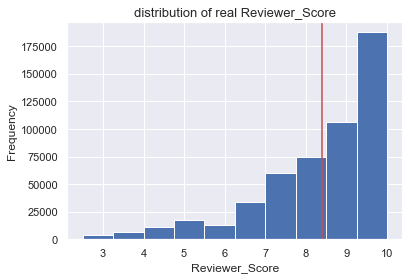

In [19]:
hotel_df['Reviewer_Score'].plot(kind='hist')
plt.xlabel("Reviewer_Score")
plt.title("distribution of real Reviewer_Score",fontsize=13)
plt.axvline(x=hotel_df['Reviewer_Score'].mean(), color='r', linestyle='-')
plt.show()

In [20]:
hotel_df['Reviewer_Score'].agg(['mean','median']).to_frame()

,Reviewer_Score
mean,8.395532
median,8.800000


In [21]:
(hotel_df['Reviewer_Score']==8).sum()

505

- Rounded `Reviewer_Score` is a right skewed distribution, and looks like more discrete compare with the real Reviewer_Score.
- There is no Reviewer_Score fall into the intervel of 5 to 6.
- Rounded data and real data have a similar mean (8.4), but the rounded data has a sightly larger median. Which means it has a sightly larger right skew level.
- Rounded data has more reviews counts on 8 points about 110000 reviews, and there are more 8 points than 9 points from the observation. At the sametime real data, 9 points (around 100000) has more counts compare with 8 (about 75000)ponits reviews.

### g. Given this will be a classification problem, what is a potential problem with this distribution?

Q1: Given a review score classificaify will a costumer provide more positive commit or not.

Q2: Given a review score classificaify costumer will stay a longer time or short.

Q3: Given a review  classificaify this is a good review (customer is happly with the stay or not).

## 2.This dataset has a good mix of numeric and non-numeric columns.  

### a. Which columns are numeric? 

In [22]:
hotel_round.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515212 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515212 non-null  object 
 1   Additional_Number_of_Scoring                515212 non-null  int64  
 2   Review_Date                                 515212 non-null  object 
 3   Average_Score                               515212 non-null  float64
 4   Hotel_Name                                  515212 non-null  object 
 5   Reviewer_Nationality                        515212 non-null  object 
 6   Negative_Review                             515212 non-null  object 
 7   Review_Total_Negative_Word_Counts           515212 non-null  int64  
 8   Total_Number_of_Reviews                     515212 non-null  int64  
 9   Positive_Review                             515212 non-null  object 
 

In [23]:
# numeric columns
numeric_col=hotel_round.select_dtypes(include=np.number).columns

In [24]:
print(f"numeric columns are {numeric_col}")

numeric columns are Index(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'lat',
       'lng'],
      dtype='object')


### b. Which are non-numeric?

In [25]:
non_numeric_col=[]
for col in hotel_round.columns:
    if col not in numeric_col:
        non_numeric_col.append(col)
print(f'None_numberic columns are {non_numeric_col}')

None_numberic columns are ['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Positive_Review', 'Tags', 'days_since_review']


### c. Can you turn some of the non-numeric columns to numeric?

In [26]:
hotel_round[non_numeric_col].sample(4)

,Hotel_Address,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags,days_since_review
131226,29 31 Gower Street Camden London WC1E 6HG Unit...,5/12/2016,Bloomsbury Palace Hotel,United Kingdom,I knew it was a small room but it was really ...,Staff on reception very friendly,"[' Leisure trip ', ' Solo traveler ', ' Small ...",448 day
172558,4 18 Harrington Gardens Kensington and Chelsea...,2/2/2016,Millennium Gloucester Hotel London,United Kingdom,The hotel does not own it s parking and the o...,Staff were excellent extremely helpful friend...,"[' Leisure trip ', ' Couple ', ' Standard Doub...",548 day
343038,Hietzinger Hauptstra e 10 14 13 Hietzing 1130 ...,1/5/2016,Austria Trend Parkhotel Sch nbrunn Wien,Portugal,No Negative,Nice small Hotel very European style the staf...,"[' Leisure trip ', ' Family with young childre...",576 day
389463,Nou de la Rambla 36 Ciutat Vella 08001 Barcelo...,6/23/2016,Onix Liceo,United Kingdom,No Negative,Staff were very friendly and helpful the layo...,"[' Leisure trip ', ' Group ', ' Double or Twin...",406 day


In [27]:
hotel_round['Reviewer_Nationality'].value_counts()

 United Kingdom               245110
 United States of America      35349
 Australia                     21648
 Ireland                       14814
 United Arab Emirates          10229
                               ...  
 Cape Verde                        1
 Northern Mariana Islands          1
 Tuvalu                            1
 Guinea                            1
 Palau                             1
Name: Reviewer_Nationality, Length: 227, dtype: int64

- column `Reviewer_Nationality` these reviews are from 227 countries, there are too many of them with can't change into dummy variables,
or use change into numeric dolumn.

In [28]:
hotel_round['Hotel_Name'].value_counts()

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3577
DoubleTree by Hilton Hotel London Tower of London    3212
                                                     ... 
Boundary Rooms Suites                                  12
Hotel Daniel Paris                                     12
Hotel Wagner                                           10
Mercure Paris Porte d Orleans                          10
Hotel Gallitzinberg                                     8
Name: Hotel_Name, Length: 1492, dtype: int64

- Column `Hotel_Name` has the same situation as the `Hotel_Name` column. Cannot change into numeric dolumn.

- **Plan**
- column `days_since_review` can be change into numeric int, git rid of the day in the column.

In [29]:
# extract numbers from days_since_review column
hotel_round['days_since_review']=hotel_round['days_since_review'].str.extract('([0-9]+)', expand=False).str.strip()

In [30]:
# change datatype into int64
hotel_round['days_since_review']=hotel_round['days_since_review'].astype('int64')

In [31]:
hotel_round.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515212 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515212 non-null  object 
 1   Additional_Number_of_Scoring                515212 non-null  int64  
 2   Review_Date                                 515212 non-null  object 
 3   Average_Score                               515212 non-null  float64
 4   Hotel_Name                                  515212 non-null  object 
 5   Reviewer_Nationality                        515212 non-null  object 
 6   Negative_Review                             515212 non-null  object 
 7   Review_Total_Negative_Word_Counts           515212 non-null  int64  
 8   Total_Number_of_Reviews                     515212 non-null  int64  
 9   Positive_Review                             515212 non-null  object 
 

## Data Wrangling

## 3. Build the proper dataset separation (Optional but recommended: The dataset is actually too big to run quickly on most laptops. Feel free to sample ~10% of the data as your dataset from this point on. Make sure all classes are included in your subsample.)

In [32]:
hotel_round.tail(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2,"[' Leisure trip ', ' Family with older childre...",715,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,9,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717,48.203745,16.335677
515737,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/9/2015,8.1,Atlantis Hotel Vienna,Hungary,I was in 3rd floor It didn t work Free Wife,13,2823,staff was very kind,6,1,8,"[' Leisure trip ', ' Family with young childre...",725,48.203745,16.335677


**plan**:
- Approach using ramdom sampling.
- Approach using cluster sampling.

In [33]:
hotel_round.shape

(515212, 17)

In [38]:
hotel_round['Reviewer_Score'].value_counts()

10    187592
8     110035
9     105621
7      44041
6      27765
5      24152
4       9421
3       4393
2       2192
Name: Reviewer_Score, dtype: int64

In [34]:
# approach 1 random sampling
random_sample = hotel_round.sample(frac=0.1, random_state=42)

In [36]:
random_sample=random_sample.reset_index(drop=True)

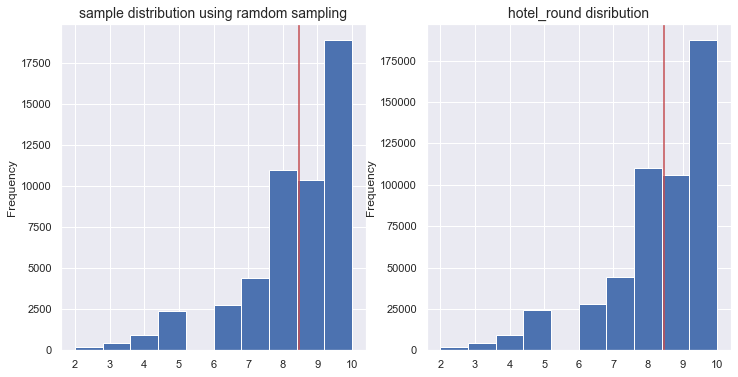

In [53]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
random_sample['Reviewer_Score'].plot(kind='hist')
plt.axvline(x=random_sample['Reviewer_Score'].mean(), color='r', linestyle='-')
plt.title("sample distribution using ramdom sampling",fontsize="14")

plt.subplot(1,2,2)
hotel_round['Reviewer_Score'].plot(kind='hist')
plt.title("hotel_round disribution",fontsize='14')
plt.axvline(x=hotel_round['Reviewer_Score'].mean(), color='r', linestyle='-')

plt.show()

- random_sample using ramdom sampling progress has the same distribution as the original data. The reason I want to try the cluster sampling is I can't tell this random_sample df has data from all classes.

In [38]:
sample['Reviewer_Score'].agg(["mean",'median'])

mean      8.46484
median    9.00000
Name: Reviewer_Score, dtype: float64

In [43]:
sample['Reviewer_Score'].value_counts()

10    18949
8     11026
9     10409
7      4386
6      2748
5      2409
4       940
3       435
2       219
Name: Reviewer_Score, dtype: int64

In [35]:
class_size=hotel_round.shape[0]/(hotel_round.shape[0]*0.1)
class_size

10.0

In [36]:
# size of cluster
hotel_round.shape[0]*0.1/10

5152.120000000001

In [38]:
# clustered Sampling
def get_clustered_Sample(df, n_per_cluster, num_select_clusters):
    N = len(df)
    K = int(N/n_per_cluster)
    data = None
    for k in range(K):
        sample_k = df.sample(n_per_cluster)
        sample_k["cluster"] = np.repeat(k,len(sample_k))
        df = df.drop(index = sample_k.index)
        data = pd.concat([data,sample_k],axis = 0)

    random_chosen_clusters = np.random.randint(0,K,size = num_select_clusters)
    samples = data[data.cluster.isin(random_chosen_clusters)]
    return(samples)

In [39]:
samples=get_clustered_Sample(hotel_round,5120,10)

In [40]:
sample_df=samples.iloc[:,0:17]
sample_df.reset_index(drop=True,inplace=True)


In [41]:
# check sample size
sample_df.shape

(51200, 17)

In [42]:
print(f'There are {sample_df.shape[0]} rows and {sample_df.shape[1]} columns in the sample data.')

There are 51200 rows and 17 columns in the sample data.


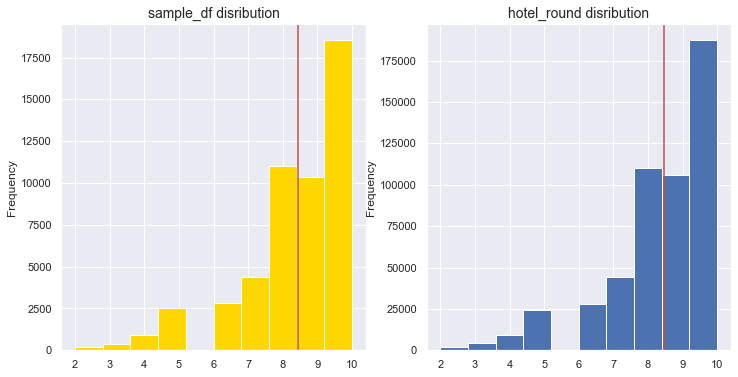

In [43]:
# check distrubution of the sample and orginal df
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sample_df['Reviewer_Score'].plot(kind='hist',color='gold')
plt.title("sample_df disribution",fontsize='14')
plt.axvline(x=sample_df['Reviewer_Score'].mean(), color='r', linestyle='-')

plt.subplot(1,2,2)
hotel_round['Reviewer_Score'].plot(kind='hist')
plt.title("hotel_round disribution",fontsize='14')
plt.axvline(x=hotel_round['Reviewer_Score'].mean(), color='r', linestyle='-')
plt.show()


- Sample_df and origin dataset has same distribution.

### a. Convert the Reviewer_Score column into a binary column in the following way. Reviews that are below 9 should be encoded as 0 ('not good') and reviews with scores 9 and 10 as 1 ('good').

In [44]:
sample_df['Reviewer_Score'].value_counts()

10    18573
8     11006
9     10383
7      4365
6      2826
5      2505
4       938
3       401
2       203
Name: Reviewer_Score, dtype: int64

In [45]:
# Change into binary outcome 9, 10--->1 else 0
sample_df["Reviewer_Score"]=np.where(sample_df["Reviewer_Score"] >8, 1, 0)

In [46]:
sample_df['Reviewer_Score'].value_counts() 

1    28956
0    22244
Name: Reviewer_Score, dtype: int64

### b. Convert the columns you identified in question 2 into numeric columns, and drop all non-numeric columns except Positive_Review and Negative_Review.

In [47]:
sample_df.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,Piazza Fontana 3 Milan City Center 20122 Milan...,563,6/26/2016,8.6,Rosa Grand Milano Starhotels Collezione,United States of America,Not a thing,5,4000,Great hotel in a great location,8,9,1,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",403,45.463822,9.194027
1,101 Buckingham Palace Road Westminster Borough...,838,6/21/2016,8.4,The Grosvenor,United Kingdom,No Negative,0,3274,Fabulous location for the orient express,7,4,1,"[' Leisure trip ', ' Couple ', ' Deluxe Single...",408,51.495666,-0.145279
2,372 Strand Westminster Borough London WC2R 0JJ...,2288,5/29/2016,8.1,Strand Palace Hotel,United Kingdom,Room rather hot although we did have a fan,10,9568,Good breakfast choices,4,8,0,"[' Leisure trip ', ' Couple ', ' Cosy Double R...",431,51.511099,-0.120867


- `days_since_review` has already changed into numeric in Q2

In [48]:
new_non_numeric_col=non_numeric_col[:7]
drop_col=new_non_numeric_col[:4]+new_non_numeric_col[6:]

In [49]:
print(f'Need drop columns:{drop_col}')

Need drop columns:['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality', 'Tags']


In [50]:
sample_df.shape

(51200, 17)

In [51]:
sample_txt=sample_df.copy()
sample_txt.drop(columns=drop_col,axis=1,inplace=True)

In [52]:
# 5 columns has been droped
sample_txt.shape

(51200, 12)

### C. Split the data into train and test sets.

plan:
  
  1.clean
  - pre process on `Negative_Review` and `Positive_Review`
  
  2.Split the data into train and test sets.



In [53]:
sample_txt[sample_txt['Negative_Review'].str.len()<15]['Negative_Review'].value_counts()

No Negative       12611
 Nothing           1412
 Nothing            412
 nothing            217
 None               108
                  ...  
 Ist room tiny        1
 Mainly price         1
 No cons              1
 pricey               1
 Little noise         1
Name: Negative_Review, Length: 915, dtype: int64

- There are None, Nothing,nothing,None in the `Negative_Review` all means No Negative, I will replace thim into 'NA'.

In [54]:
# replace None, Nothing,nothing, into ''
sample_txt['Negative_Review']=sample_txt['Negative_Review'].apply(lambda x: x.replace('No Negative','NA'))
sample_txt['Negative_Review']=sample_txt['Negative_Review'].apply(lambda x: x.replace('Nothing','NA'))
sample_txt['Negative_Review']=sample_txt['Negative_Review'].apply(lambda x: x.replace('nothing','NA'))
sample_txt['Negative_Review']=sample_txt['Negative_Review'].apply(lambda x: x.replace('N A','NA'))
sample_txt['Negative_Review']=sample_txt['Negative_Review'].apply(lambda x: x.replace('N a','NA'))
sample_txt['Negative_Review']=sample_txt['Negative_Review'].apply(lambda x: x.replace('None','NA'))
sample_txt['Negative_Review']=sample_txt['Negative_Review'].apply(lambda x: x.replace('none','NA'))
sample_txt['Negative_Review']=sample_txt['Negative_Review'].apply(lambda x: x.replace('na','NA'))

- clean column `Positive_Review`

In [55]:
sample_txt[sample_txt['Positive_Review'].str.len()<15]['Positive_Review'].value_counts()

No Positive       3602
 Location          934
 Everything        215
 location          175
 Nothing           119
                  ... 
 Staff Design        1
 Nice bathroom       1
 roof Pool           1
 The staff           1
 good price          1
Name: Positive_Review, Length: 965, dtype: int64

- replace No Positive,na into 'NA' 

In [56]:
sample_txt['Positive_Review']=sample_txt['Positive_Review'].apply(lambda x: x.replace('No Positive','NA'))
sample_txt['Positive_Review']=sample_txt['Positive_Review'].apply(lambda x: x.replace('na','NA'))

In [57]:
sample_txt[sample_txt['Negative_Review'].str.len()<15]['Negative_Review'].value_counts()

NA                12611
 NA                1942
 NA                 468
                     94
 Small room          46
                  ...  
 Room cold            1
 No showercap         1
 The clining          1
 No balcony           1
 Little noise         1
Name: Negative_Review, Length: 976, dtype: int64

In [58]:
sample_txt[sample_txt['Positive_Review'].str.len()<15]['Positive_Review'].value_counts()

NA                3602
 Location          934
 Everything        215
 location          175
 Nothing           119
                  ... 
 Staff Design        1
 Nice bathroom       1
 roof Pool           1
 The staff           1
 good price          1
Name: Positive_Review, Length: 965, dtype: int64

In [59]:
# feature and target
X=sample_txt.drop(['Reviewer_Score'],axis=1)
y=sample_txt['Reviewer_Score']
# split train test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [60]:
y_train_nor=y_train.value_counts()/len(y_train)
y_test_nor=y_test.value_counts()/len(y_test)

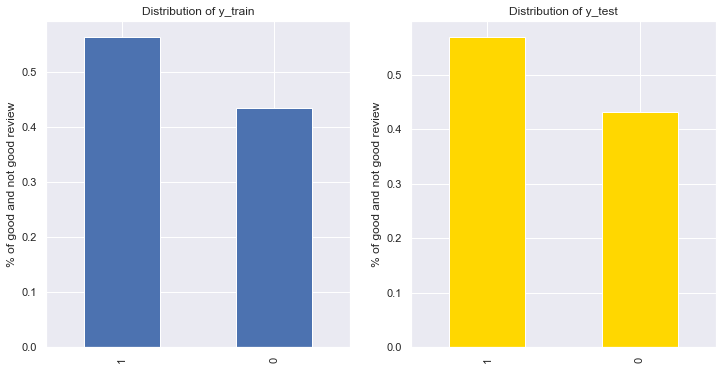

In [61]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Distribution of y_train")
plt.ylabel("% of good and not good review")
y_train_nor.plot(kind='bar')
#plt.ax.bar_label(bars)

plt.subplot(1,2,2)
plt.title("Distribution of y_test")
plt.ylabel("% of good and not good review")
y_test_nor.plot(kind='bar',color='gold')

plt.show()

- y_train and y_test has samilar distribution.

### d. Use a count vectorizer to combine Positive_Review and Negative_Review with the numeric data (notice that this is done AFTER the train/test split). You should vectorize each column separately, ending up with two sparse matrixes, and then combine the three matrixes (numeric data, positive matrix, negative matrix). You may have to adjust the min_df parameter.

**function tokenizer:**
  - remove punctuation
  - remove stop words
  - Stemming
  - Tokenization

In [62]:
# init stemmer
stemmer = nltk.stem.PorterStemmer()
# make tokens
def tokenizer(text):
    non_pun=''.join([w for w in text.lower() if w not in string.punctuation])
    #print(type(non_pun),non_pun)

    lst_words=non_pun.split(' ')
    #print(lst_words)
    # remove stop words and stem
    lst_out=[]
    for w in lst_words:
        if (w not in stopwords.words('english')) and (w != ""):
            stemmed_word = stemmer.stem(w)
            lst_out.append(stemmed_word)
    return lst_out    

In [63]:
X_train['Negative_Review'].shape

(40960,)

In [64]:
X_test['Negative_Review'].shape

(10240,)

In [ ]:
# column Negative_Review
coun_vect = CountVectorizer(tokenizer=tokenizer, min_df=5)

# fit
coun_vect.fit(X_train['Negative_Review'])
# transfrom x_train and x_test need to be the same shape
X_train_trans_NR=coun_vect.transform(X_train['Negative_Review'])
X_test_trans_NR=coun_vect.transform(X_test['Negative_Review'])

D:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_train_trans_NR
print(f'The shape of NR_count_matrix is {X_train_trans_NR.shape[0]} rows and {X_train_trans_NR.shape[1]} columns.')

In [ ]:
X_test_trans_NR
print(f'The shape of NR_count_matrix is {X_test_trans_NR.shape[0]} rows and {X_test_trans_NR.shape[1]} columns.')

- `Negative_Review` X_train and X_test has the same features. 

In [ ]:
# column postitive_Review
#count_vect=CountVectorizer(tokenizer=tokenizer)

# fit
coun_vect.fit(X_train['Positive_Review'])

# transform
X_train_trans_PR=coun_vect.transform(X_train['Positive_Review'])
X_test_trans_PR=coun_vect.transform(X_test['Positive_Review'])

In [ ]:
X_train_trans_PR
print(f'The shape of NR_count_matrix is {X_train_trans_PR.shape[0]} rows and {X_train_trans_PR.shape[1]} columns.')

In [ ]:
X_test_trans_PR
print(f'The shape of NR_count_matrix is {X_test_trans_PR.shape[0]} rows and {X_test_trans_PR.shape[1]} columns.')

- `Positive_Review` Train and test has same features

In [ ]:
# numeric numbers
X_train_trans_NU=X_train.drop(columns=['Positive_Review','Negative_Review'],axis=1)
X_test_trans_NU=X_test.drop(columns=['Positive_Review','Negative_Review'],axis=1)

In [ ]:
# combine the matrixs
X_train_combined = pd.concat([X_train_trans_NU, pd.DataFrame(X_train_trans_PR.toarray()), pd.DataFrame(X_train_trans_NR.toarray())], axis=1)
X_test_combined = pd.concat([X_test_trans_NU, pd.DataFrame(X_test_trans_PR.toarray()), pd.DataFrame(X_test_trans_NR.toarray())], axis=1)

In [ ]:
X_train_combined.shape

In [ ]:
X_test_combined.shape

### e. What does the min_df parameter do?

- set min_df=5: min_df parameter controls the minimum number of documents a word must be in to be included in the vocabulary.
- If I take min_df parameter out from CountVectorizer instantiation, there will be around 10000-20000 features for the train,test split of `Positive_Review` and `Negative_Review`. With will create a super large size combined sparse matrixes, which cannot generate by jupyter notebook (over than 3.8 gb).
